<a href="https://colab.research.google.com/github/adrianatrevinoe/ArtificialInteligenceWorks/blob/main/PandasTips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Mistakes

1. Writing to a csv with unnecesary index

In [69]:
# Mount Google Drive in Collab
from google.colab import drive
drive.mount('/content/drive/')

# Imports standard libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [70]:
# Load data from file
df = pd.read_csv(filepath_or_buffer="/content/drive/MyDrive/Colab Notebooks/datasets/weight-height.csv", sep=',', skiprows=0)


*   When writing with csv with unnecesary non valuable index:


```
      Index = False

      or 

      index_col = [0]
```


*   No spaces in columns names

In [71]:
df.to_csv('output.csv',index=False)
df = pd.read_csv('output.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## Queries
Instead of 


```
df.loc[(df['Year'] < 2010) & (df['Time'] > 10)]
```
Use: 

```
df.query('Year < 1980 and Time >10')
```





In [72]:
df.query('Height < 70 and Weight > 200')

,Gender,Height,Weight
4,Male,69.881796,206.349801
33,Male,69.180161,205.183621
34,Male,69.577202,204.164125
86,Male,66.596197,208.345694
111,Male,68.190684,201.487962
...,...,...,...
4661,Male,69.153102,201.994030
4744,Male,69.859331,202.805975
4754,Male,69.469447,202.649823
4840,Male,69.599795,208.948775


**Don't use string methods to formulate queries**


'Year < ' + str{min_height} + .......'

In [73]:
min_height = 70
min_weight = 200
df= df.query('Height < @min_height and Weight > @min_weight')
df.head(3)

,Gender,Height,Weight
4,Male,69.881796,206.349801
33,Male,69.180161,205.183621
34,Male,69.577202,204.164125


**Don't use inplace = True**
It overwrites dataframe with changes


```
df.fillna(0, inplace = True)
df.reset_index(inplace = True)
```



overwrite with the modifications

In [74]:
df = df.fillna(0)
df = df.reset_index()

**Don't iter through cols**

To determine rows with height greater than 65


```
for i, row in df.iterrows():
  if row [ 'Height'] > 65:
    df.loc[i, 'is_recent'] = True
  else:
    df.loc[i, 'is_recent'] = False
```



In [75]:
df['greater_than_70'] = df['Height'] > 70
df

,index,Gender,Height,Weight,greater_than_70
0,4,Male,69.881796,206.349801,False
1,33,Male,69.180161,205.183621,False
2,34,Male,69.577202,204.164125,False
3,86,Male,66.596197,208.345694,False
4,111,Male,68.190684,201.487962,False
...,...,...,...,...,...
168,4661,Male,69.153102,201.994030,False
169,4744,Male,69.859331,202.805975,False
170,4754,Male,69.469447,202.649823,False
171,4840,Male,69.599795,208.948775,False


In [76]:
df['height_square'] = df.apply(lambda row: row['Height']**2, axis = 1)
df.head(3)

,index,Gender,Height,Weight,greater_than_70,height_square
0,4,Male,69.881796,206.349801,False,4883.465393
1,33,Male,69.180161,205.183621,False,4785.894690
2,34,Male,69.577202,204.164125,False,4840.987089


**It's best to create a .copy of the dataframe to edit the dataframe**

In [77]:
df_tall= df.query('Height > 70').copy()
# df_tall['super_tall'] = df_tall['Height']
df_tall.head(3)

,index,Gender,Height,Weight,greater_than_70,height_square


Apply changes not all at once


```
df2 = df.query('Year > 1975')
df3= df2.groupby(['Athlete'] ) [['Time']].min()
df_out = df3.sort_values('Time')
df out
```

In [78]:
df_out = (df.query('Height > 50')
  # .groupby(['Weight'])[['Gender']].min()
  .sort_values('Height')
)
df_out

,index,Gender,Height,Weight,greater_than_70,height_square
124,3524,Male,66.145868,202.130274,False,4375.275836
3,86,Male,66.596197,208.345694,False,4435.053393
99,2815,Male,67.075852,203.493687,False,4499.169911
7,163,Male,67.233931,203.350339,False,4520.401467
40,953,Male,67.283507,203.135760,False,4527.070371
...,...,...,...,...,...,...
23,485,Male,69.974301,212.804259,False,4896.402783
66,1622,Male,69.983137,206.414412,False,4897.639529
57,1446,Male,69.989953,208.107783,False,4898.593522
148,4137,Male,69.990098,206.660949,False,4898.613872


In [79]:
df_bool = df.copy()
df_bool['sub70'] = df_bool['Height'] < 70
df_bool.head(5)

,index,Gender,Height,Weight,greater_than_70,height_square,sub70
0,4,Male,69.881796,206.349801,False,4883.465393,True
1,33,Male,69.180161,205.183621,False,4785.894690,True
2,34,Male,69.577202,204.164125,False,4840.987089,True
3,86,Male,66.596197,208.345694,False,4435.053393,True
4,111,Male,68.190684,201.487962,False,4649.969385,True


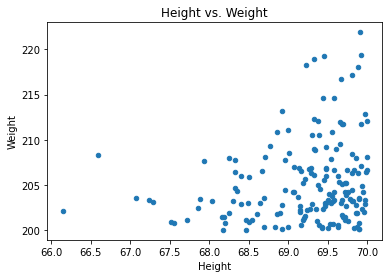

In [80]:
ax = df.plot(kind = 'scatter',
             x = 'Height',
             y = 'Weight',
             title = 'Height vs. Weight'
             )

**Don't use string methods manually**

In [81]:
df['Gender_Upper'] = df['Gender'].str.upper()
df.head

<bound method NDFrame.head of      index Gender     Height      Weight  greater_than_70  height_square  \
0        4   Male  69.881796  206.349801            False    4883.465393   
1       33   Male  69.180161  205.183621            False    4785.894690   
2       34   Male  69.577202  204.164125            False    4840.987089   
3       86   Male  66.596197  208.345694            False    4435.053393   
4      111   Male  68.190684  201.487962            False    4649.969385   
..     ...    ...        ...         ...              ...            ...   
168   4661   Male  69.153102  201.994030            False    4782.151557   
169   4744   Male  69.859331  202.805975            False    4880.326189   
170   4754   Male  69.469447  202.649823            False    4826.004041   
171   4840   Male  69.599795  208.948775            False    4844.131457   
172   4870   Male  69.969886  203.275695            False    4895.784924   

    Gender_Upper  
0           MALE  
1           MALE  



**Don't repeat code**
```
# Transform mens
dfw = pd. read_csv('womens 100m.csv')
dfw['Time_Norm'] = dfw['Time'] / dfw['Time'].mean()
d'fw['Place'] = dfw['Place'].str.lower()
dfw.head()

# Transform womens
|dfm = pd. read_csv ('mens 100m.csv')
dfm ['Time_Norm'] = dfm['Time'] / dfm ['Time'].mean()
dfm['Place'] = dfm['Place'].str.lower()
dfm.head()
```



```
def process data(df):
  df['Time_Norm'] = df['Time'] / df['Time'].mean()
  df [ 'Place'] = df['Place'].str.lower()
  return df

dfw = pd. read csv ('womens 100m.csv')
dfm = pd. read_csv ('mens 100m.csv')

dfm = process_data(dfm)
dfw = process_data(dfw)| I
dfw
```





**Rename Columns**


```
df = pd. read_csv('mens 100m.csv')
print('Old Columns:', df.columns.tolist())
df.columns = ['Race_Year', 'Time', 'Athlete', 'Place', 'Name']|
print('New Columns:', df.columns.tolist())
df.head()
```

---> good way
```
df = pd.read_csv('mens 100m.csv')
df = df. rename (columns={'Year': 'Race_Year'})
df.head()

```



In [82]:
df_bool = df_bool.rename(columns={'Gender': 'Genders New'})
df_bool.head(2)

,index,Genders New,Height,Weight,greater_than_70,height_square,sub70
0,4,Male,69.881796,206.349801,False,4883.465393,True
1,33,Male,69.180161,205.183621,False,4785.894690,True


**Aggregating(group) by groups**

Return lowest men and women time value

```
mens_record = df.loc[df['Grouping'] == 'Mens']['Time'].min()
womens_record = df.loc[df['Grouping'] == 'Womens']['Time'].min()
print (mens_record, womens_record)
```
--->

```
df.groupby('Grouping')['Time'].min()
```





In [83]:
df.groupby('Gender')['Height'].min()

Gender
Male    66.145868
Name: Height, dtype: float64

In [84]:
df.groupby('Gender')['Height'].mean()

Gender
Male    69.21371
Name: Height, dtype: float64

**Looping over rows in df to create groupings**

here we iterate over each row in df, storing the results after each iter

```
mens_times = []
womens_times = []
# Get mens and womens average
for i, row in df.iterrows():
  group = row.Grouping
  if group == "Mens":
    mens_times.append(row. Time)
  else:
    womens_times.append(row. Time)

avg_mens = np.mean(mens_times)
avg_womens np.mean(womens_times)
mens_count = len (mens_times)
womens_count = len (womens_times)
print (avg_mens, avg_womens, mens_count, womens_count)
```
-->

```
df.groupby('Grouping') [ 'Time'].agg ( ['mean', 'count'])
```

In [85]:
df.groupby('Gender')['Height'].agg(['mean','count', 'std'])

,mean,count,std
Gender,,,
Male,69.21371,173,0.704999


**Calculate change in series**

*   diff()
*   pct_change()

```
import pandas as pd
df = pd. read_csv ('womens 100m.csv')
df['perc_change'] = df['Time'].pct_change()
df['change'] = df['Time'}.diff()
df.head()
```



## Styling



In [86]:
df.sort_values('Height').head (10) [ [ 'Gender', 'Height']] \
  .reset_index(drop=True) \
  .style \
  .background_gradient (cmap="Reds")

,Gender,Height
0,Male,66.145868
1,Male,66.596197
2,Male,67.075852
3,Male,67.233931
4,Male,67.283507
5,Male,67.519372
6,Male,67.556183
7,Male,67.725619
8,Male,67.864747
9,Male,67.881889


In [87]:
df2 = pd.DataFrame (np. random. randn (10,4), columns=['A', 'B', 'C','D'])
df2.style.format('{:.3f}', na_rep="")\
  .bar(align=0, vmin=-2.5, vmax=2.5, cmap="bwr", height=50, width=60, props="width: 120px; border-right: 1px solid black;")\
  .text_gradient(cmap="bwr", vmin=-2.5, vmax=2.5)

TypeError: ignored

**categorical data types**

Take less space in memory and can make faster operations in large datasets 

It's better to store men and women as **categorical data** instead of as a string object as below.

In [88]:
df['Gender']

0      Male
1      Male
2      Male
3      Male
4      Male
       ... 
168    Male
169    Male
170    Male
171    Male
172    Male
Name: Gender, Length: 173, dtype: object

In [89]:
df['Gender'] = df['Gender'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   index            173 non-null    int64   
 1   Gender           173 non-null    category
 2   Height           173 non-null    float64 
 3   Weight           173 non-null    float64 
 4   greater_than_70  173 non-null    bool    
 5   height_square    173 non-null    float64 
 6   Gender_Upper     173 non-null    object  
dtypes: bool(1), category(1), float64(3), int64(1), object(1)
memory usage: 7.3+ KB
